# Deep Neural Networks Marathon

print torch info

In [1]:
# torch version and gpu info on pc
import torch

print('torch version',torch.__version__, 'number of gpu',torch.cuda.device_count())
for id in range(torch.cuda.device_count()): print('gpu info', torch.cuda.get_device_properties(id))

torch version 2.1.0+cu121 number of gpu 1
gpu info _CudaDeviceProperties(name='NVIDIA GeForce RTX 3050 4GB Laptop GPU', major=8, minor=6, total_memory=4095MB, multi_processor_count=20)


In [1]:
# torch version and gpu info on workstation
import torch

print('torch version',torch.__version__, 'number of gpu',torch.cuda.device_count())
for id in range(torch.cuda.device_count()): print('gpu info', torch.cuda.get_device_properties(id))


torch version 2.1.0+cu121 number of gpu 1
gpu info _CudaDeviceProperties(name='Quadro RTX 5000', major=7, minor=5, total_memory=16383MB, multi_processor_count=48)


architecture of alexnet style1

In [28]:
# alexnet

import torch
import torch.nn as nn
import torch.nn.functional as F


class AlexNet(nn.Module):# 这行代码定义了一个名为 AlexNet 的 PyTorch 模型类，它继承自 nn.Module 类。nn.Module 是 PyTorch 中所有模型类的基类。
    ##super() 函数用于获取父类的实例。在本例中，父类是 nn.Module。
    ##(AlexNet, self) 是元组，用于指定子类和当前实例。
    ##__init__() 是 Python 中类的构造函数。它在类实例化时被调用，用于初始化类的属性和方法。
    ##self 是 Python 中的自我引用，表示当前类的实例。num_classes 是参数，用于指定模型的类别数。
    def __init__(self, num_classes=10):
        super(AlexNet, self).__init__() 
        #卷积层用于提取图像中的特征。
        #该层将输入图像 (3 通道 RGB 图像) 转换为 96 通道特征图。卷积核大小为 11，步长为 4，填充为 2。
        self.conv1 = nn.Conv2d(3, 96, kernel_size=11, stride=4, padding=2) 
        ##池化层用于减少特征图的大小。第一个池化层使用 3x3 的最大池化核，步长为 2。 
        ##这意味着它会在输入特征图上移动 2 个像素，并取每个池化核覆盖区域内的最大值。这样可以减少特征图的大小，并保留最重要的信息。
        self.pool1 = nn.MaxPool2d(kernel_size=3, stride=2) 
        self.conv2 = nn.Conv2d(96, 256, kernel_size=5, stride=1, padding=2)
        self.pool2 = nn.MaxPool2d(kernel_size=3, stride=2)
        self.conv3 = nn.Conv2d(256, 384, kernel_size=3, stride=1, padding=1)
        self.conv4 = nn.Conv2d(384, 256, kernel_size=3, stride=1, padding=1)
        self.pool4 = nn.MaxPool2d(kernel_size=3, stride=2)
        self.conv5 = nn.Conv2d(384, 256, kernel_size=3, stride=1, padding=1)
        ##全连接层用于将提取到的特征进行分类。第一个全连接层有 4096 个神经元。这意味着它会将提取到的特征向量投影到一个 4096 维度的空间中。
        ##第二个全连接层也有 4096 个神经元。这意味着它会进一步将特征向量投影到一个 4096 维度的空间中。第三个全连接层有 10 个神经元，对应于 10 个类别。
        self.fc1 = nn.Linear(256 * 6 * 6, 4096) 
        self.fc2 = nn.Linear(4096, 4096)
        self.fc3 = nn.Linear(4096, num_classes)

    # forward() 方法是模型的前向传播函数。它用于将输入数据转换为输出数据。
    def forward(self, x):
        x = self.conv1(x)
        ##ReLU 激活函数用于卷积层和全连接层。ReLU 激活函数是一种非线性激活函数，它可以将输入值映射到 0 和正无穷之间。
        ##ReLU 激活函数可以加速模型的收敛速度，并防止梯度消失问题。
        ##F.relu(x) 是 PyTorch 中 F 模块中的一个函数。它是一个函数，可以应用到输入张量中。
        x = F.relu(x)
        x = self.pool1(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = self.pool2(x)
        x = self.conv3(x)
        x = F.relu(x)
        x = self.conv4(x)
        x = F.relu(x)
        x = self.pool4(x)
        #x = self.conv5(x)
        ##view将张量展平为一维张量,其大小为 (batch_size, channels * height * width)
        ##x.size(0) 表示 x 的第一个维度，即 batch_size。-1 表示 x 的其他维度将被自动计算。
        x = x.view(x.size(0), -1)
        print(x.size())
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        return x

In [29]:
# test model
model = AlexNet(num_classes=10)
#print(model)
x = torch.randn(2, 3, 224, 224)  # 随机生成一个张量
out = model(x) 

torch.Size([2, 9216])


architecture of alexnet style2

In [45]:
# alexnet, another implemention
import torch
import torch.nn as nn
import torch.nn.functional as F

'''
nn.BatchNorm2d()：批量归一化 (Batch Normalization) 是深度学习中非常常用的归一化函数。
它通过将每个样本的输入归一化到相同的均值和方差来提高模型的稳定性和性能。

nn.GroupNorm()：分组归一化 (Group Normalization) 是批量归一化的一种变体。
它将输入张量分成多个组，并对每个组进行归一化。这使得 GroupNorm 更适合处理具有大量参数的模型。

nn.LayerNorm()：层归一化 (Layer Normalization) 是批量归一化的另一种变体。
它将归一化应用于每个层的输出，而不是每个样本的输入。这使得 LayerNorm 更适合处理具有不同长度输入的模型。

nn.InstanceNorm2d()：实例归一化 (Instance Normalization) 是批量归一化的另一种变体。
它将归一化应用于每个样本中的每个通道。这使得 InstanceNorm 更适合处理具有不同分布的数据。

nn.LazyBatchNorm2d()：惰性批量归一化 (Lazy Batch Normalization) 是批量归一化的一种变体。
它在训练时使用批量归一化，在推理时使用指数移动平均 (EMA) 来计算均值和方差。这使得 LazyBatchNorm2d 在推理时速度更快。

nn.SyncBatchNorm()：同步批量归一化 (Sync Batch Normalization) 是批量归一化的一种变体。
它在多 GPU 训练中使用，将均值和方差同步到所有 GPU 上。这使得 SyncBatchNorm 在多 GPU 训练中更稳定。

nn.LazyInstanceNorm2d()：惰性实例归一化 (Lazy Instance Normalization) 是实例归一化的一种变体。
它在训练时使用实例归一化，在推理时使用指数移动平均 (EMA) 来计算均值和方差。这使得 LazyInstanceNorm2d 在推理时速度更快。
串联网络的几种方法：
nn.Sequential()
nn.ModuleList()：用于将多个神经网络层连接起来，但这些层可以是任意顺序。
nn.ModuleDict()：用于将多个神经网络层连接起来，并将它们分为不同的组。
nn.ModuleList() 和 nn.ModuleDict() 都需要手动连接神经网络层。
'''

class AlexNet1(nn.Module):
    def __init__(self, num_classes=1000):
        super(AlexNet1, self).__init__()
        ##nn.Sequential() 是 PyTorch 中的一个类，用于将多个神经网络层连接起来。它可以看作是一个容器，用于存储神经网络层。
        ##self.features 属性将存储一个 nn.Sequential() 对象，其中包含多个神经网络层。这些神经网络层将被按顺序连接起来，并应用于输入数据。
        self.features = nn.Sequential(
            nn.Conv2d(3, 96, kernel_size=11, stride=4, padding=2),
            ##当 inplace=False 时，nn.ReLU() 函数将返回一个新的张量，该张量包含了应用 ReLU 激活函数后的结果。
            ##当 inplace=True 时，nn.ReLU() 函数将直接将计算结果保存在 x 中，并返回 x。可以节省内存.
            ##nn.ReLU 是 PyTorch 中 nn 模块中的一个类。它是一个层，可以应用到输入张量中。
            nn.ReLU(inplace=True),
            ##局部响应归一化 (LRN) 的技术来提高模型的泛化能力。在AlexNet中提出。
            ##LRN 通过将相邻像素的值归一化来减少梯度爆炸和梯度消失的问题。
            nn.LocalResponseNorm(size=5, alpha=1e-4, beta=0.75),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(96, 192, kernel_size=5, padding=2),
            nn.ReLU(inplace=True),
            nn.LocalResponseNorm(size=5, alpha=1e-4, beta=0.75),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(192, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),)
        self.classifier = nn.Sequential(
            nn.Dropout(p=0.2),
            nn.Linear(256 * 6 * 6, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, num_classes),
            nn.Softmax(dim=1))
    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), 256 * 6 * 6)
        x = self.classifier(x)
        return x

In [46]:
# test model
model = AlexNet1(num_classes=10)
print(model)
x = torch.randn(3,3, 224, 224)  # 随机生成一个张量
out = model(x) 

AlexNet1(
  (features): Sequential(
    (0): Conv2d(3, 96, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): LocalResponseNorm(5, alpha=0.0001, beta=0.75, k=1.0)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(96, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (5): ReLU(inplace=True)
    (6): LocalResponseNorm(5, alpha=0.0001, beta=0.75, k=1.0)
    (7): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Dropout(p=0.2, inpl

architecture of vgg16    

![architecture of vgg16](./figures/vgg16model.png)    
imgae credit: http://deanhan.com/2018/07/26/vgg16/

In [1]:
# vgg16
import torch
import torch.nn as nn
import torch.nn.functional as F

class VGG16(nn.Module):
    def __init__(self):
        super(VGG16, self).__init__()

        self.conv1_1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1)
        self.conv1_2 = nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv2_1 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.conv2_2 = nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv3_1 = nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1)
        self.conv3_2 = nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1)
        self.conv3_3 = nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1)
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv4_1 = nn.Conv2d(256, 512, kernel_size=3, stride=1, padding=1)
        self.conv4_2 = nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1)
        self.conv4_3 = nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1)
        self.pool4 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv5_1 = nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1)
        self.conv5_2 = nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1)
        self.conv5_3 = nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1)
        self.pool5 = nn.MaxPool2d(kernel_size=2, stride=2)

        # fully connected layer
        self.fc1 = nn.Linear(7*7*512, 4096)
        self.fc2 = nn.Linear(4096, 4096)
        self.fc3 = nn.Linear(4096, 1000)

    def forward(self, x):
        x = self.conv1_1(x)
        x = F.relu(x)
        x = self.conv1_2(x)
        x = F.relu(x)
        x = self.pool1(x)

        x = self.conv2_1(x)
        x = F.relu(x)
        x = self.conv2_2(x)
        x = F.relu(x)
        x = self.pool2(x)

        x = self.conv3_1(x)
        x = F.relu(x)
        x = self.conv3_2(x)
        x = F.relu(x)
        x = self.conv3_3(x)
        x = F.relu(x)
        x = self.pool3(x)

        x = self.conv4_1(x)
        x = F.relu(x)
        #x = F.softmax(x)
#以下是 VGG 模型中没有 softmax 层的一些具体原因：

#交叉熵损失函数可以直接计算输出与真实标签之间的差异，不需要 softmax 层。
#在测试过程中，通常使用 argmax 操作来直接从输出中选择类别。
#使用 softmax 层会增加模型的参数数量，并增加模型的计算复杂度。


architecture of resnet50

![architecture of resnet50](./figures/resnet50.png)

image credit: https://images.app.goo.gl/JV37VthfM7AdCxBy9

In [4]:
# resnet50
import torch
import torch.nn as nn
import torch.nn.functional as F
# reference: https://blog.paperspace.com/writing-resnet-from-scratch-in-pytorch/
class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride = 1, downsample = None):
        super(ResidualBlock, self).__init__()
        self.conv1 = nn.Sequential(
                        nn.Conv2d(in_channels, out_channels, kernel_size = 3, stride = stride, padding = 1),
                        nn.BatchNorm2d(out_channels),
                        nn.ReLU())
        self.conv2 = nn.Sequential(
                        nn.Conv2d(out_channels, out_channels, kernel_size = 3, stride = 1, padding = 1),
                        nn.BatchNorm2d(out_channels))
        self.downsample = downsample
        self.relu = nn.ReLU()
        self.out_channels = out_channels
        
    def forward(self, x):
        residual = x
        out = self.conv1(x)
        out = self.conv2(out)
        if self.downsample:
            residual = self.downsample(x)
        out += residual
        out = self.relu(out)
        return out
    
class ResNet(nn.Module):
    def __init__(self, block, layers, num_classes = 10):
        super(ResNet, self).__init__()
        self.inplanes = 64
        self.conv1 = nn.Sequential(
                        nn.Conv2d(3, 64, kernel_size = 7, stride = 2, padding = 3),
                        nn.BatchNorm2d(64),
                        nn.ReLU())
        self.maxpool = nn.MaxPool2d(kernel_size = 3, stride = 2, padding = 1)
        self.layer0 = self._make_layer(block, 64, layers[0], stride = 1)
        self.layer1 = self._make_layer(block, 128, layers[1], stride = 2)
        self.layer2 = self._make_layer(block, 256, layers[2], stride = 2)
        self.layer3 = self._make_layer(block, 512, layers[3], stride = 2)
        self.avgpool = nn.AvgPool2d(7, stride=1)
        self.fc = nn.Linear(512, num_classes)
        
    def _make_layer(self, block, planes, blocks, stride=1):
        downsample = None
        if stride != 1 or self.inplanes != planes:
            
            downsample = nn.Sequential(
                nn.Conv2d(self.inplanes, planes, kernel_size=1, stride=stride),
                nn.BatchNorm2d(planes),
            )
        layers = []
        layers.append(block(self.inplanes, planes, stride, downsample))
        self.inplanes = planes
        for i in range(1, blocks):
            layers.append(block(self.inplanes, planes))

        return nn.Sequential(*layers)
    
    
    def forward(self, x):
        x = self.conv1(x)
        x = self.maxpool(x)
        x = self.layer0(x)
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.avgpool(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)

        return x


architecture of unet

architecture of resunet

architecture of transformer

architecture of transunet

output parameters of a model

In [8]:
from torchsummary import summary

summary(model=AlexNet(), input_size=(3,224,224), batch_size=1, device='cpu')

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [1, 96, 55, 55]          34,944
         MaxPool2d-2            [1, 96, 27, 27]               0
            Conv2d-3           [1, 256, 27, 27]         614,656
         MaxPool2d-4           [1, 256, 13, 13]               0
            Conv2d-5           [1, 384, 13, 13]         885,120
            Conv2d-6           [1, 256, 13, 13]         884,992
         MaxPool2d-7             [1, 256, 6, 6]               0
            Linear-8                  [1, 4096]      37,752,832
            Linear-9                  [1, 4096]      16,781,312
           Linear-10                    [1, 10]          40,970
Total params: 56,994,826
Trainable params: 56,994,826
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.57
Forward/backward pass size (MB): 5.46
Params size (MB): 217.42
Est

visualize a model

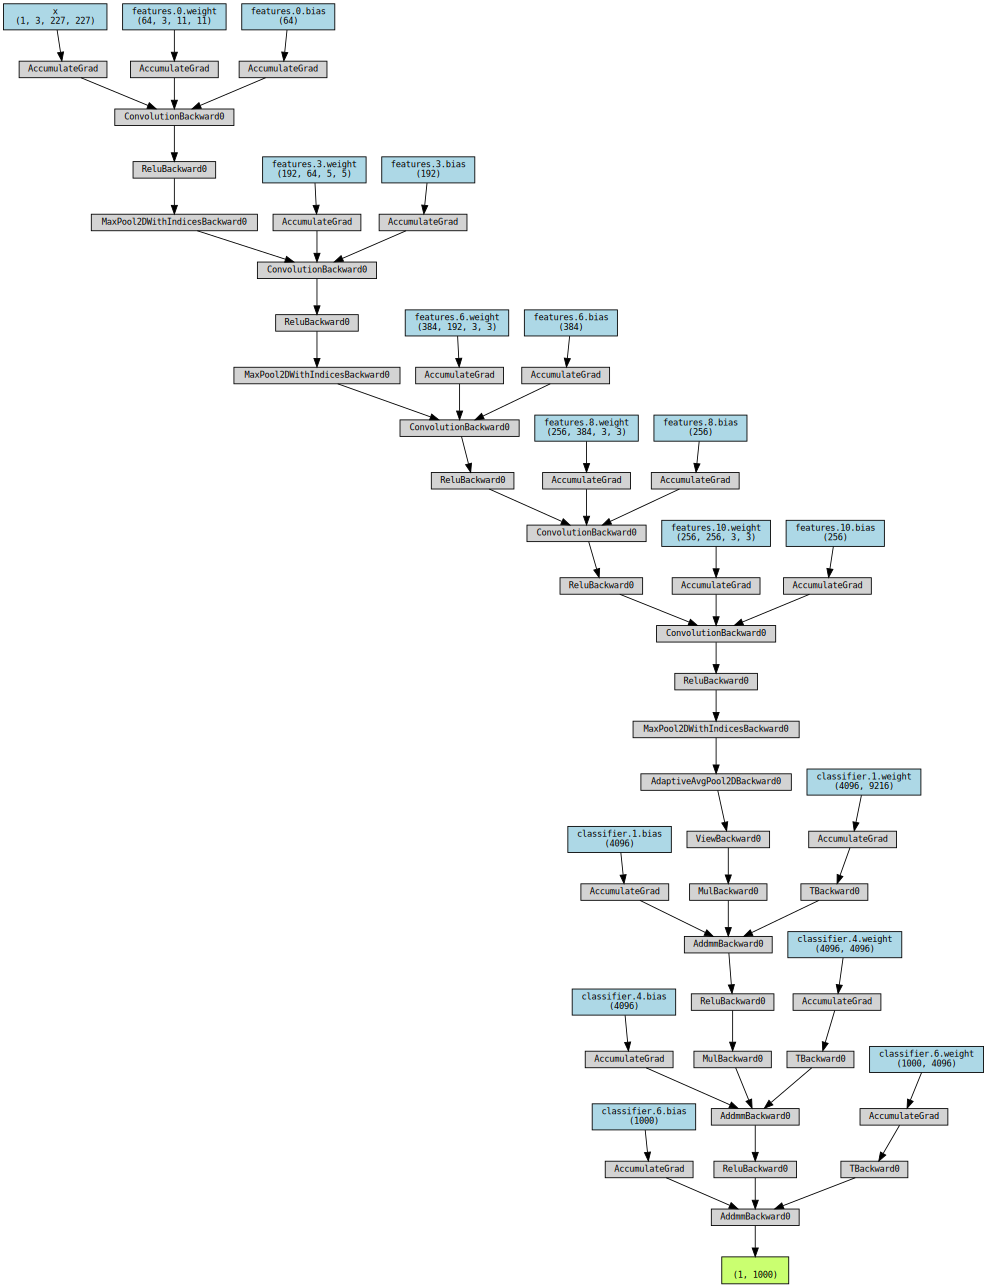

In [9]:
# visualize a model method 1
'''
install graphviz.exe + torchviz
如果你的电脑还是无法画图,并且出现了下面的报错:
CalledProcessError: Command '['dot', '-Tpdf', '-O', iitH.gv']' returned non-zero exit status 1. [st
那么我们这个时候就可以按照下面步骤完成画图:
1.打开cmd(使用管理员身份,要不然没有权限)
2.运行:dot-v
3.出现问题:There is no layout engine support for "dot" ...
4.运行:dot-c
5.没有提示(成功)
6.再次运行dot-v
7.结果就会画图成功
'''
from torchviz import make_dot, make_dot_from_trace
from torchvision.models import AlexNet
model = AlexNet()

x = torch.randn(1, 3, 227, 227).requires_grad_(True)
y = model(x)
make_dot(y, params=dict(list(model.named_parameters()) + [('x', x)]))
#g = make_dot(y, params=dict(list(model.named_parameters()) + [('x', x)]))
#g.view()  # 直接在当前路径下保存 pdf 并打开
# g.render(filename='netStructure/myNetModel', view=False, format='pdf')  # 保存 pdf 到指定路径不打开

In [6]:
# visualize a model method 2
from torchvision.models import AlexNet
import netron
import torch.onnx

model = AlexNet()

x = torch.randn(1, 3, 227, 227).requires_grad_(True)
y = model(x)

modelData = "./demo.pth"  # 定义模型数据保存的路径
torch.onnx.export(model, x, modelData)  # 将 pytorch 模型以 onnx 格式导出并保存
netron.start(modelData)  # 输出网络结构

#  针对已经存在网络模型 .pth 文件的情况
#modelData = "./demo.pth"  # 定义模型数据保存的路径
#netron.start(modelData)  # 输出网络结构

Serving './demo.pth' at http://localhost:8080


('localhost', 8080)

data loader

In [ ]:
# load data
import torch

# 定义数据集类
class MyDataset(torch.utils.data.Dataset):
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels

    def __getitem__(self, index):
        return self.data[index], self.labels[index]

    def __len__(self):
        return len(self.data)

# 加载数据
data = torch.randn(100, 10)
labels = torch.randint(0, 10, (100,))

# 创建数据集
dataset = MyDataset(data, labels)

# 加载数据
loader = torch.utils.data.DataLoader(dataset, batch_size=128)

# 迭代加载器
for images, labels in loader:
    print(images.size())
    print(labels.size())


training

In [ ]:
# training



learning curve

prediction